# Biodiversity in National Parks Data Analysis Project

This project cleans, analyzes, and presents a dataset of wildlife observations in four U.S. National Parks: Bryce Canyon, Great Smoky Mountains, Yellowstone, and Yosemite using Python. After formatting the data to explore it, I use it to investigate five research questions around conserved and threatened species, animal categories, and more specifically mammals in each of the parks. I present my findings along with the corresponding code in this Jupyter Notebook.

Please view this project's slide deck on <a href="https://www.canva.com/design/DAFcdY_GiRU/qr86ee4caENqgADrYcXy0A/view?utm_content=DAFcdY_GiRU&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton">Canva</a></div> .

While Codecademy Pro provided me with this dataset as a project in the BI Data Analyst Career Path, I wrote all of the code and text completely on my own.

### Import libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

### Load, inspect, and tidy the data

In [2]:
#Load data into DataFrames
observations_df = pd.read_csv('observations.csv')
species_info_df = pd.read_csv('species_info.csv')

#### Observations_df DataFrame

In [3]:
#Inspect first 10 rows
display(observations_df.head())

#Explore columns
print(observations_df.columns)

#Explore row counts
print(observations_df.count())

#Explore data types
print(observations_df.dtypes)

#Explore value counts by column
##for column in observations_df.columns:
    ##print(observations_df[column].value_counts())

#Check for missing data
nan_observations_df = observations_df.isna()
print(nan_observations_df.value_counts())

#Check for duplicate data
print(len(observations_df[observations_df.duplicated()]))

#Consolidate observations from same species in the same park
consolidated_observations_df = observations_df.groupby(['scientific_name', 'park_name']).observations.sum().reset_index()
print(len(consolidated_observations_df))

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Index(['scientific_name', 'park_name', 'observations'], dtype='object')
scientific_name    23296
park_name          23296
observations       23296
dtype: int64
scientific_name    object
park_name          object
observations        int64
dtype: object
scientific_name  park_name  observations
False            False      False           23296
dtype: int64
15
22164


##### Missing data, duplicates, and modifications
The observations_df Dataframe has three columns (`scientific_name`, `park_name`, `observations`). The first two are objects, while observations are in integer format. There is no missing data. The observations_df has 15 duplicates which I attribute to chance. I consolidated the DataFramehere into one row per number of observations of a specific species in each park, reducing the length of the DataFrame from 23,296 to 22,164 observations and sorting records alphabetically by `scientific_name`.

#### Species_info_df DataFrame

In [4]:
#Inspect first 10 rows
display(species_info_df.head())

#Explore columns
print(species_info_df.columns)

#Explore row counts
print(species_info_df.count())

#Explore data types
print(species_info_df.dtypes)

#Explore value counts by column
##for column in species_info_df.columns:
    ##print(species_info_df[column].value_counts())

#Check for missing data
nan_species_df = species_info_df.isna()
print(nan_species_df.value_counts())
print(species_info_df.conservation_status.value_counts())

#Check for duplicate data
##display(species_info_df[species_info_df.duplicated()])
print(len(species_info_df[species_info_df['scientific_name'].duplicated() == True]))
print(len(species_info_df[species_info_df[['scientific_name', 'conservation_status']].duplicated() == True]))

#Create a DataFrame of only species with conservation status
conservation_df = species_info_df[species_info_df.conservation_status.notnull()]
print(len(conservation_df))
print(len(conservation_df[conservation_df['scientific_name'].duplicated() == True]))
##display(conservation_df[conservation_df['scientific_name'].duplicated() == True])
print(len(conservation_df[conservation_df[['scientific_name', 'conservation_status']].duplicated() == True]))
conservation_df = conservation_df.drop_duplicates(subset=['scientific_name'])
print(len(conservation_df))

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                         False                   191
dtype: int64
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64
283
281
191
12
11
179


##### Missing data, duplicates, and modifications
The species_info_df has four columns (`category`, `scientific_name`, `common_names`, `conservation_status`). All data types are objects.

The conservation_status column is missing 96.7% of the data. Looking at the column values above, it appears that the species with a null value are either not endangered, threatened, in recovery, or species of concern, or that the status is unknown. As a result, I will not assume that a null value indicates that there are no conservation concerns around a species. 

There are 283 duplicate rows by the `scientific_name` column. Upon further inspection, I could see that there are multiple entries per species with a different entry for `common_name`. Duplicate scientific names have either one or multiple common names listed in the `common_name` column, delimited by comma or 'or'. I decided not to drop any duplicates here in order to retain all information about common names and avoid a time-consuming modification. Instead, I created a new DataFrame that only contains species with a conservation status. There, I dropped duplicates by retaining their first occurrence. The Gray Wolf was the only duplicate with two different statuses, 'Endangered' and 'In Recovery'. I kept the record with 'In Recovery'.

### Descriptive data analysis summary

##### Observations

In [5]:
print("Number of National Parks: " + str(observations_df['park_name'].nunique()))
print()
print("Number of records of unique species by park:")
for value in consolidated_observations_df['park_name'].unique():
    park_df = consolidated_observations_df[consolidated_observations_df['park_name'] == value]
    print(value + ": " + str(park_df.scientific_name.nunique()))
print()
print("Number of observations per species ranges from " + str(consolidated_observations_df['observations'].value_counts().min()) + " to " + str(consolidated_observations_df['observations'].value_counts().max()))

Number of National Parks: 4

Number of records of unique species by park:
Bryce National Park: 5541
Great Smoky Mountains National Park: 5541
Yellowstone National Park: 5541
Yosemite National Park: 5541

Number of observations per species ranges from 1 to 195


##### Species info

In [6]:
print("Number of unique scientific species: " + str(species_info_df['scientific_name'].nunique()))
print()
print("Number of categories: " + str(species_info_df['category'].nunique()))
print((species_info_df['category'].value_counts()))

Number of unique scientific species: 5541

Number of categories: 7
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


Looking at the number of scientific species and the number of unique species by park, it appears that each park has recorded observations of each of the species stored in the species_info_df DataFrame.

In [7]:
print("Number of species with a conservation status: " + str(conservation_df['scientific_name'].nunique()))
print((conservation_df['category'].value_counts()))
print()
print("Number of of conservation status types: " + str(conservation_df['conservation_status'].nunique()))
print((conservation_df['conservation_status'].value_counts()))

Number of species with a conservation status: 179
Bird                 75
Vascular Plant       46
Mammal               30
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64

Number of of conservation status types: 4
Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: conservation_status, dtype: int64


### Research questions

1. How many observations of each threatened species does each park have?
2. Which park has the highest number of observations of endangered and threatened species?
3. For each animal category, what is the the most and least frequently sighted plant or animal for each park?
4. What are the top 5 mammals with the highest number of observations for each park?

### Analysis

#### Q1: How many observations of each threatened species does each park have?

In [8]:
#Series of conservation_info where conservation status is 'Threatened'
threatened_species = conservation_df[conservation_df.conservation_status == 'Threatened']

#Merge this series with consolidated observations DataFrame
threatened_observations = pd.merge(threatened_species, consolidated_observations_df)

def threatened_species_by_park(park):
    threatened_observations_park = threatened_observations[threatened_observations.park_name == park].reset_index(drop=True)
    sns.barplot(data=threatened_observations_park, x='common_names', y='observations', ci = None)
    sns.set(rc={"figure.figsize":(11,4)})
    ax = plt.subplot()
    plt.title('Observations of Threatened Species in ' + park)
    plt.xlabel('Common Species Name')
    plt.ylabel('Observations')
    plt.xticks(rotation=90)
    ax.set_yticks(np.arange(0, 401, 50))
    plt.savefig(park + '_threatened.png', bbox_inches="tight")
    plt.show()
    plt.clf()

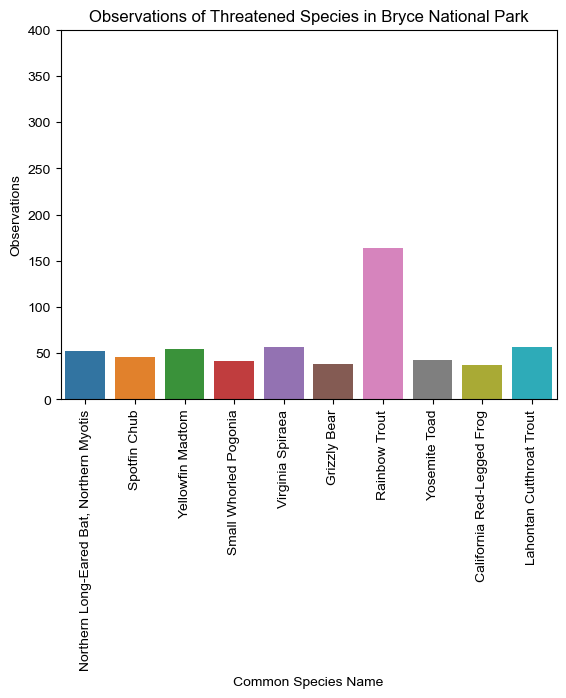

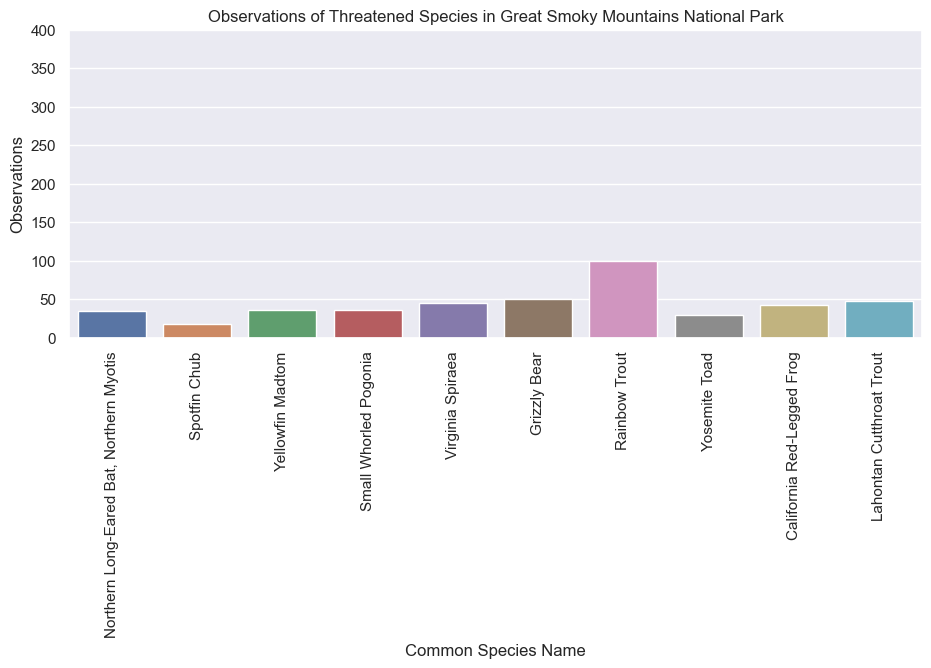

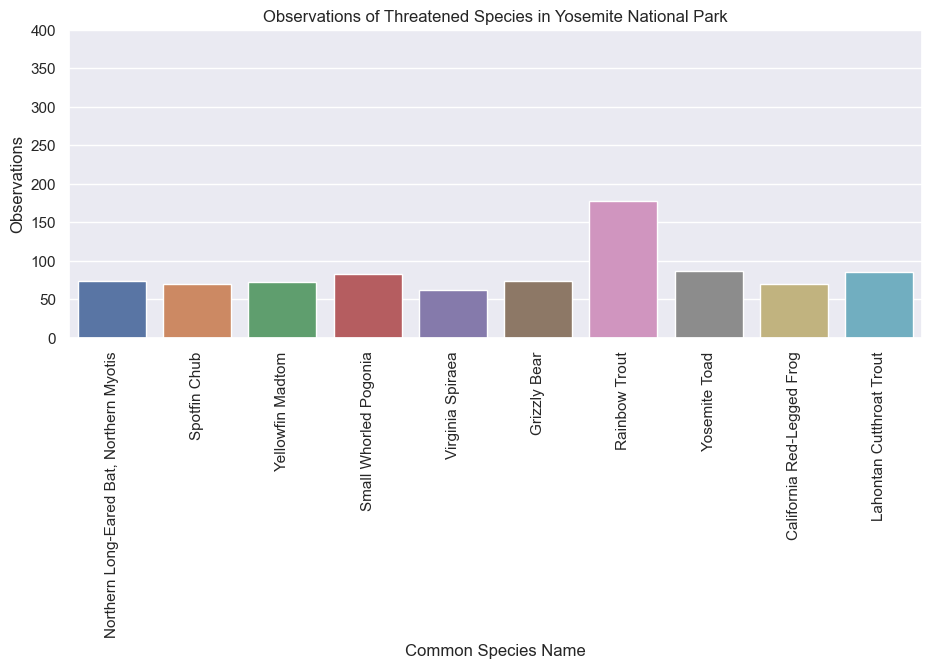

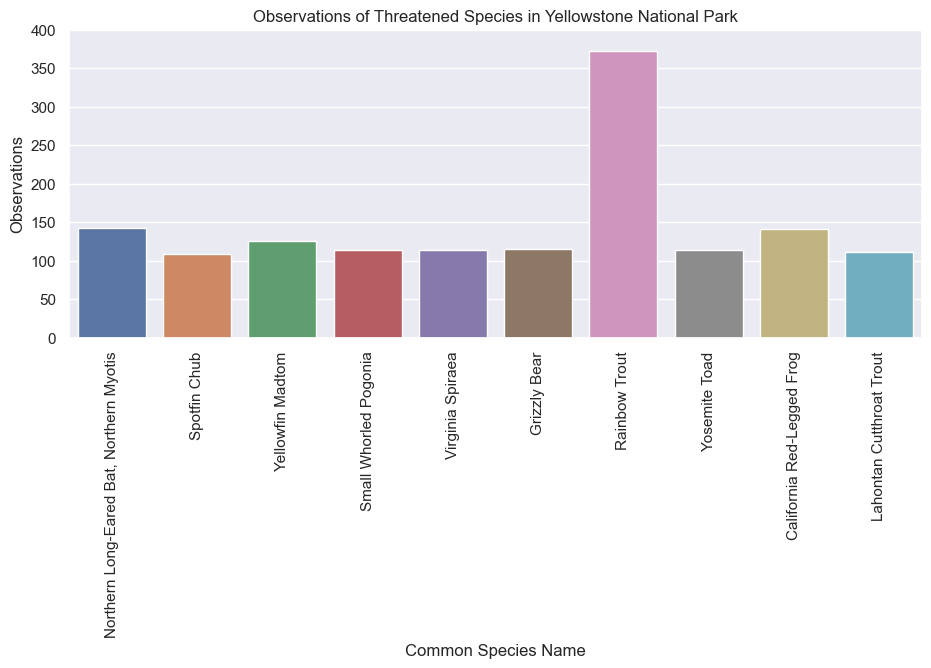

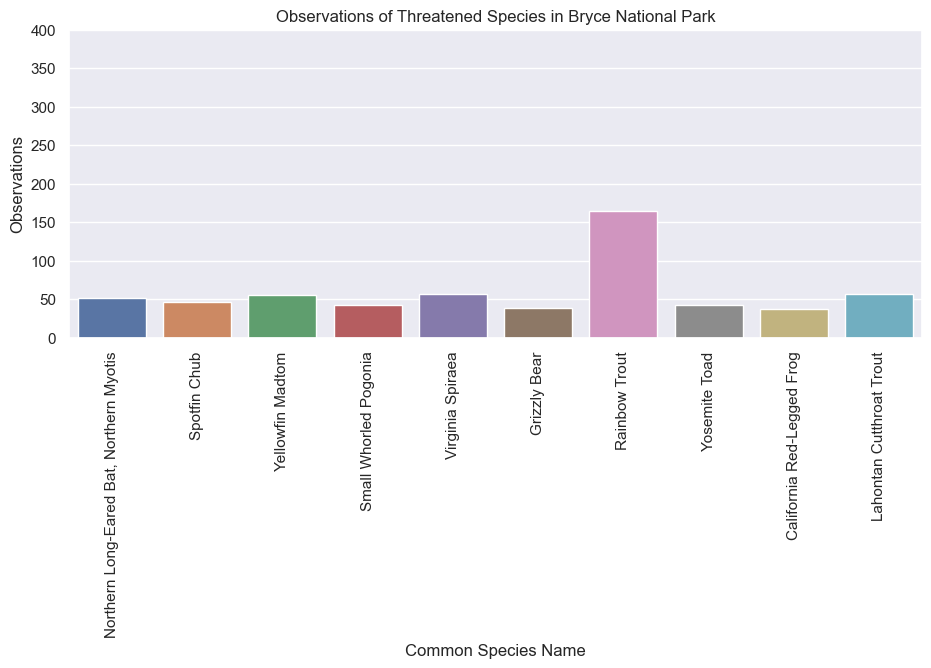

<Figure size 1100x400 with 0 Axes>

In [9]:
threatened_species_by_park('Bryce National Park')
threatened_species_by_park('Great Smoky Mountains National Park')
threatened_species_by_park('Yosemite National Park')
threatened_species_by_park('Yellowstone National Park')
threatened_species_by_park('Bryce National Park')

The relative number of observations are similar for all four parks. The Rainbow Trout shows about 2-3 times the observations of the other threatened species, ranging from about 100-375 sightings. The counts for the other 9 species are all fairly even.

Great Smoky Mountains National Park has the least members of threatened species on record while Yellowstone has the most compared to the other two parks in this dataset.

#### Q2: Which park has the highest number of observations of endangered and threatened species?

,park_name,observations,Percent
0,Bryce National Park,1080,17.598175
1,Great Smoky Mountains National Park,774,12.612025
2,Yellowstone National Park,2687,43.783608
3,Yosemite National Park,1596,26.006192


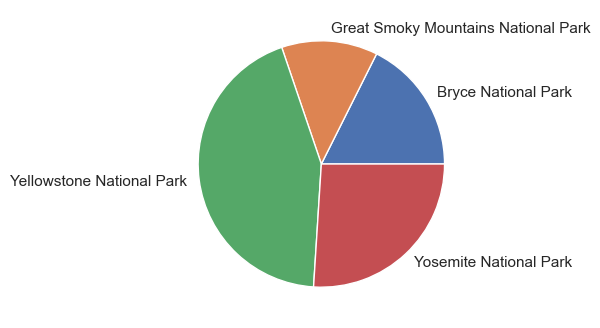

<Figure size 1100x400 with 0 Axes>

In [10]:
#Out of conservation_df, create DataFrame with endangered and threatened species only
endangered_threatened_conservation_df = conservation_df[(conservation_df.conservation_status == 'Endangered') | (conservation_df.conservation_status == 'Threatened')].reset_index(drop=True)

#Merge new DataFrame with consolidated observations
endangered_threatened_observations = pd.merge(endangered_threatened_conservation_df, consolidated_observations_df).reset_index(drop=True)

#Group by sum of observations per park
endangered_threatened_observations_park_total = endangered_threatened_observations.groupby('park_name', as_index=False).observations.sum()
percent = [observation*100/endangered_threatened_observations_park_total.observations.sum() for observation in endangered_threatened_observations_park_total.observations]
endangered_threatened_observations_park_total['Percent'] = percent
display(endangered_threatened_observations_park_total)

endangered_threatened_observations_park_total.plot.pie(y='observations', labels = endangered_threatened_observations_park_total.park_name)
ax = plt.subplot()
ax.get_legend().remove()
plt.ylabel(' ')
plt.savefig('endangered_pie.png', bbox_inches="tight")
plt.show()
plt.clf()

Yellowstone National Park is home to almost half of all observations of endangered and threatened species in this dataset. Yosemite accounts for about one quarter by itself. A little over one quarter of these observations occurred in Bryce and Great Smoky Mountains combined.

#### Q3: For each animal category, what is the the most and least frequently sighted plant or animal for each park?

In [11]:
#Merge consolidated observations and species info to obtain animal category for each observation
observations_species_info_df = pd.merge(consolidated_observations_df, species_info_df)
#Dropping duplicates, keeping first occurrence of common_name
observations_species_info_df = observations_species_info_df.drop_duplicates(subset=['scientific_name', 'park_name'])

#Function returning row with min or max of number of observations of specific category in specific park
def min_max_of_cat(df, park, cat):
    animal_categories_park = observations_species_info_df[observations_species_info_df.park_name == park].reset_index(drop=True)
    animal_categories_park_cat = animal_categories_park[animal_categories_park.category == cat].reset_index(drop=True)
    min_row = animal_categories_park_cat[animal_categories_park_cat.observations == animal_categories_park_cat.observations.min()]
    max_row = animal_categories_park_cat[animal_categories_park_cat.observations == animal_categories_park_cat.observations.max()]
    min_max_df = pd.concat([min_row, max_row])
    return min_max_df

#Function creating a diagram of bar plots for each animal category in each park, displaying max and min of observations
def cat_mins_maxs(cat):
    ax=plt.subplot()
    plt.subplot(2, 2, 1)
    sns.barplot(data=min_max_of_cat(observations_species_info_df, 'Bryce National Park', cat), x='common_names', y='observations', ci = None, color='orange')
    sns.set(rc={"figure.figsize":(5,7)})
    plt.title('Bryce')
    plt.xlabel(' ')
    plt.xticks(rotation=75)
    
    plt.subplot(2, 2, 2)
    sns.barplot(data=min_max_of_cat(observations_species_info_df, 'Great Smoky Mountains National Park', cat), x='common_names', y='observations', ci = None, color='blue')
    sns.set(rc={"figure.figsize":(5,7)})
    plt.title('Great Smoky Mountains')
    plt.xlabel(' ')
    plt.xticks(rotation=75)
    
    plt.subplot(2, 2, 3)
    sns.barplot(data=min_max_of_cat(observations_species_info_df, 'Yosemite National Park', cat), x='common_names', y='observations', ci = None, color='green')
    sns.set(rc={"figure.figsize":(5,7)})
    plt.title('Yosemite')
    plt.xlabel(' ')
    plt.xticks(rotation=75)
    
    plt.subplot(2, 2, 4)
    sns.barplot(data=min_max_of_cat(observations_species_info_df, 'Yellowstone National Park', cat), x='common_names', y='observations', ci = None, color='yellow')
    sns.set(rc={"figure.figsize":(5,7)})
    plt.title('Yellowstone')
    plt.xlabel(' ')
    plt.xticks(rotation=75)
    
    plt.subplots_adjust(hspace=3, wspace=0.5)
    plt.suptitle('Smallest & Largest Number of Observations by Park for Category: ' + str(cat))
    plt.savefig(cat + '_max_min.png', bbox_inches="tight")
    plt.show()
    plt.clf()
    
    return ('Category: ' + str(cat))

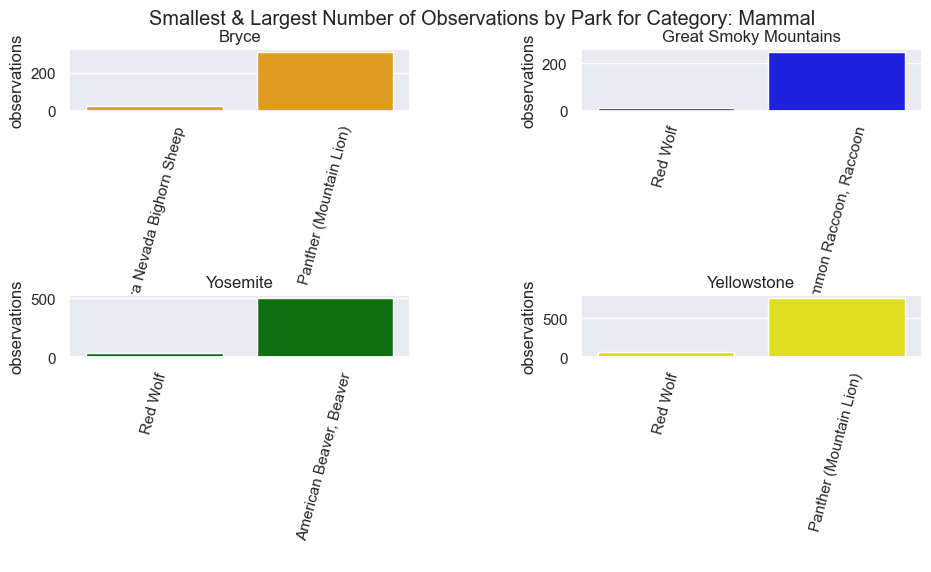

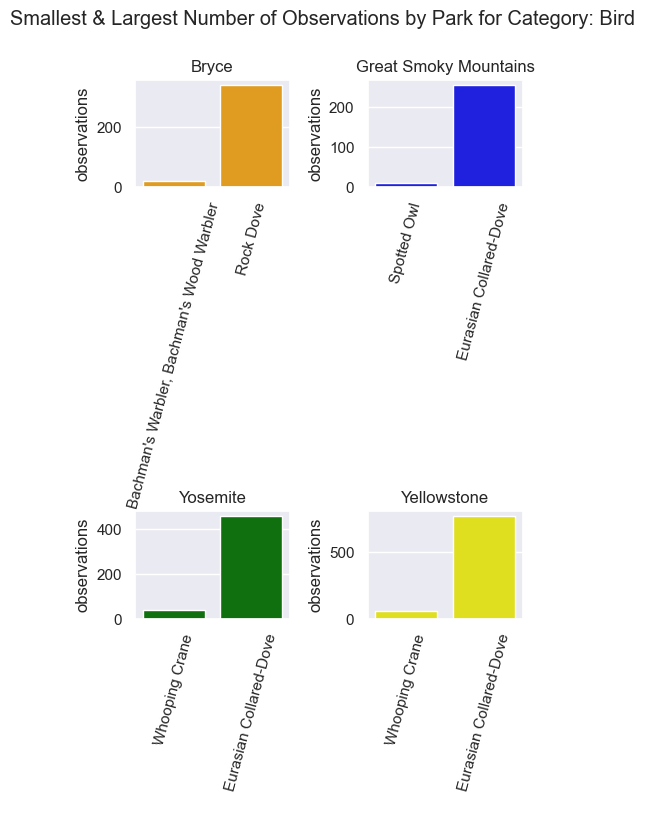

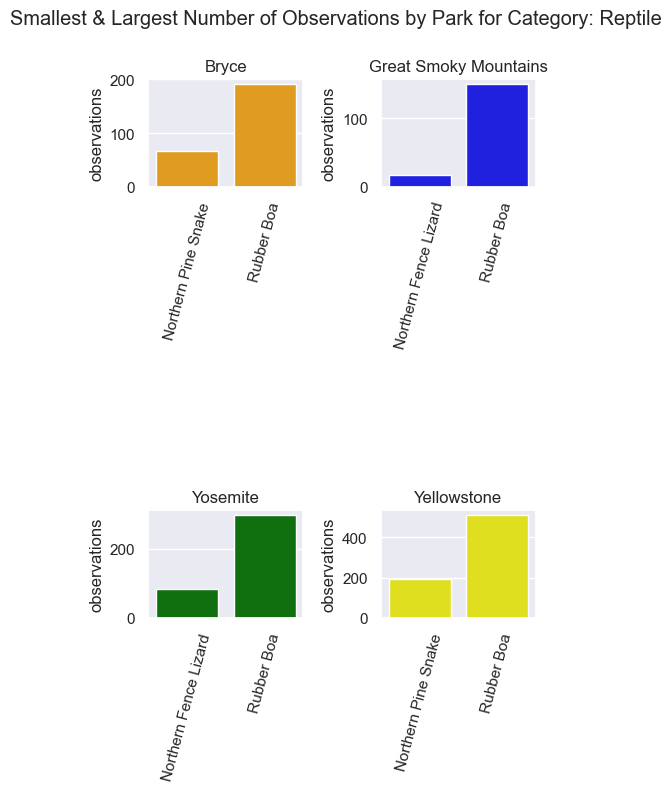

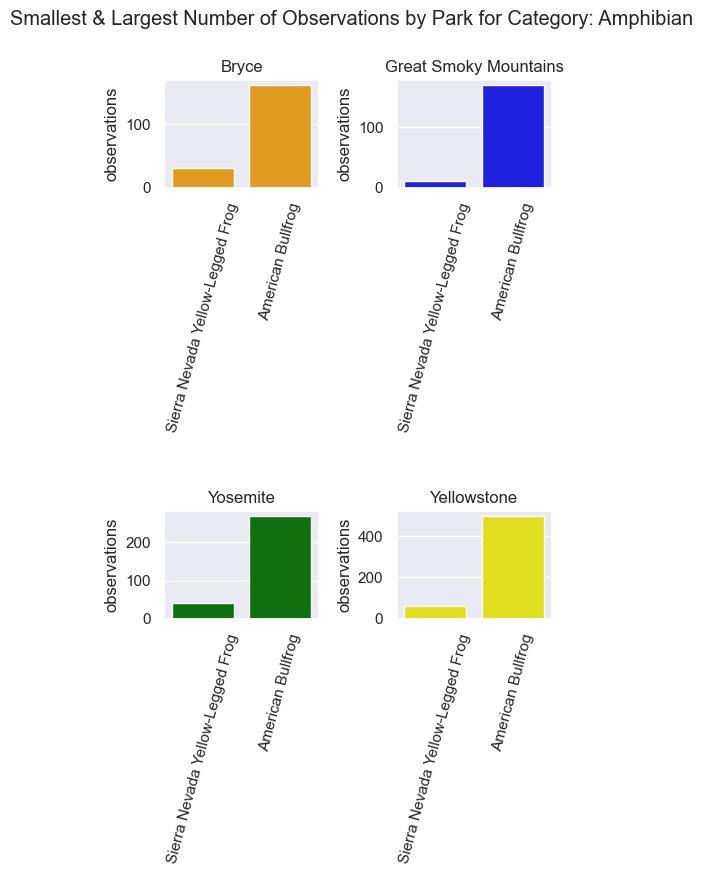

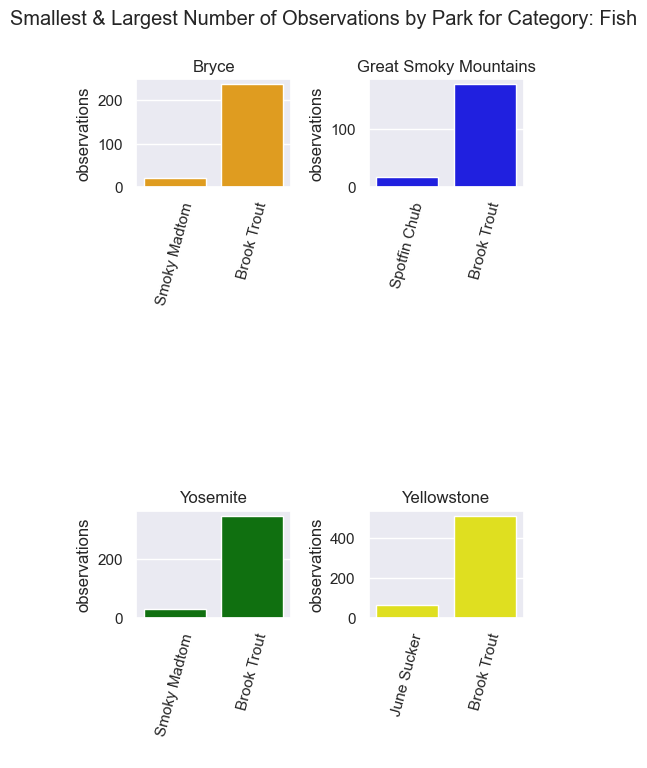

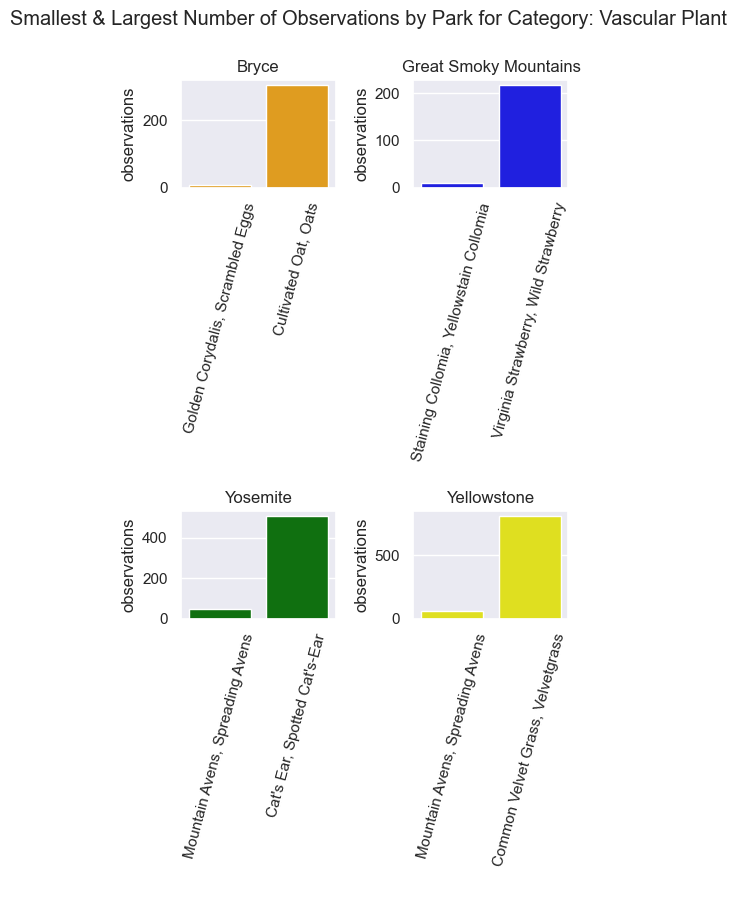

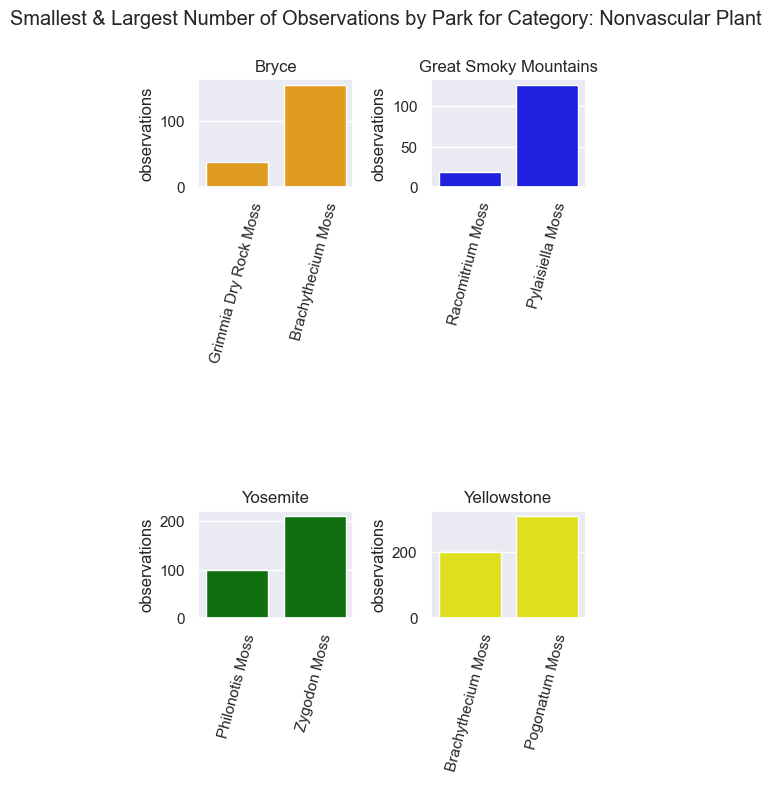

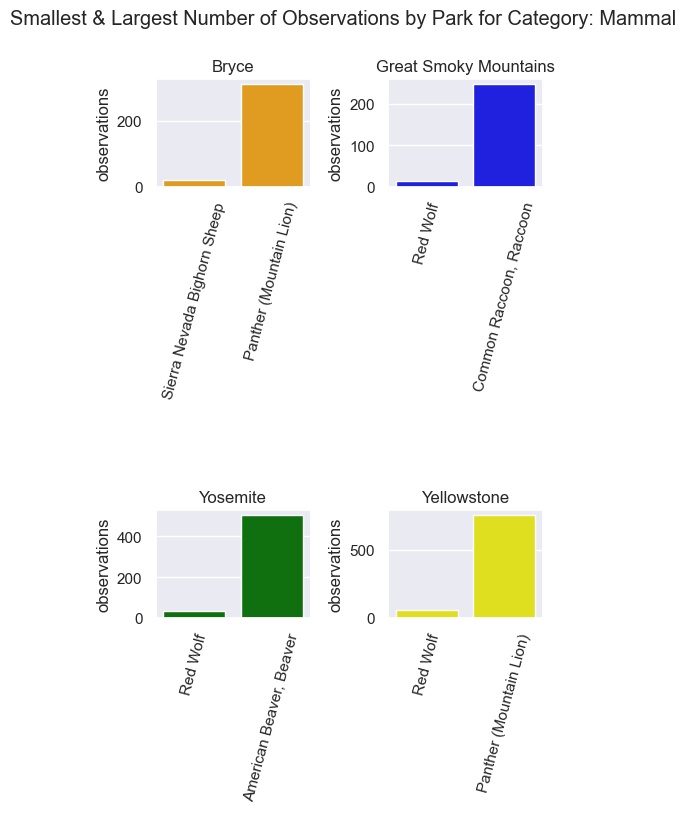

'Category: Mammal'

<Figure size 500x700 with 0 Axes>

In [12]:
cat_mins_maxs('Mammal')
cat_mins_maxs('Bird')
cat_mins_maxs('Reptile')
cat_mins_maxs('Amphibian')
cat_mins_maxs('Fish')
cat_mins_maxs('Vascular Plant')
cat_mins_maxs('Nonvascular Plant')
cat_mins_maxs('Mammal')

In [13]:
display(min_max_of_cat(observations_species_info_df, 'Bryce National Park', 'Mammal'))
display(min_max_of_cat(observations_species_info_df, 'Great Smoky Mountains National Park', 'Mammal'))
display(min_max_of_cat(observations_species_info_df, 'Yosemite National Park', 'Mammal'))
display(min_max_of_cat(observations_species_info_df, 'Yellowstone National Park', 'Mammal'))

,scientific_name,park_name,observations,category,common_names,conservation_status
102,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered
115,Puma concolor,Bryce National Park,311,Mammal,Panther (Mountain Lion),NaN


,scientific_name,park_name,observations,category,common_names,conservation_status
13,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered
114,Procyon lotor,Great Smoky Mountains National Park,247,Mammal,"Common Raccoon, Raccoon",NaN


,scientific_name,park_name,observations,category,common_names,conservation_status
13,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered
14,Castor canadensis,Yosemite National Park,501,Mammal,"American Beaver, Beaver",NaN


,scientific_name,park_name,observations,category,common_names,conservation_status
13,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered
115,Puma concolor,Yellowstone National Park,753,Mammal,Panther (Mountain Lion),NaN


Mammals and Vascular Plants display the largest difference between most and least observed species. The smallest difference can be observed in the sightings of nonvascular plants.

- **Mammal**: In all parks except Bryce, the Red Wolf is the least frequently sighted mammal. In Bryce, it is the Sierra Nevada Bighorn Sheep. In both Bryce and Yellowstone, the Mountain Lion has recorded the most observations out of all species, whereas for Yosemite and Great Smoky Mountains, it is the American Beaver and Common Raccoon, respectively.  
<p>&nbsp;</p>
- **Bird**: Doves are the most sighted birds in all four parks, the Eurasian Collared-Dove for all parks except Bryce, where it is the Rock Dove. In Yoesmite and Yellowstone, the Whooping Crane shows the smallest number of sightings. In Bryce, Bachman's Wood Warbler is the least frequently observed bird. In the Great Smoky Mountains, it is the Spotted Owl.
<p>&nbsp;</p>
- **Reptile**: The Rubber Boa is the most observed reptile species in all four parks. In Bryce and Yellowstone, the least sighted reptile is the Northern Pine Snake. The Northern Fence Lizard takes this spot in Yosemite and the Great Smoky Mountains.
<p>&nbsp;</p>
- **Amphibian**: The American Bullfrog is the most observed reptile in all four parks, while the Sierra Nevada Yellow-Legged Frog is the least sighted.
<p>&nbsp;</p>
- **Fish**: In all parks, the Brook Trout is fish observed most often. Bryce and Yosemite share the Smoky Madtom as their fish with the smallest number ov observations. In Yellowstone, it is the June Sucker, and in the Great Smoky Mountains, the Spotfin Chub.
<p>&nbsp;</p>
- **Vascular Plant**: Cultivated Oat is most common in Bryce, while Scrambled Eggs are least common. The Wild Strawberry has recorded the most observations out of all vascular plants in the Great Smoky Mountains; the opposite is true for Yellowstain Collomia. Velvet Grass and Cat's Ear are the most observed plants in Yosemite and Yellowstone, respectively, whereas the most rarely sighted plant in both parks is the Mountain Avens.
<p>&nbsp;</p>
- **Nonvascular Plant**: Each park has recorded different species for their most and least frequently observed nonvascular plants. Brachythecium Moss is the most sighted moss in Bryce, but the least sighted one in Yellowstone. The Grimmia Dry Rock Moss is the least common moss in Bryce, Pylaisiella Moss the most common one in Yellowstone. In the Great Smoky Mountains, it is Pylaiseiella Moss (highest) and Racomitrium Moss (lowest), and in Yosemite, it is Zygodon Moss (highest) and Philonotis Moss (lowest).

#### Q4: What are the top 5 mammals with the highest number of observations for each park?

In [14]:
def top5_of_cat(df, park, cat, bar_color=None):
    animal_categories_park = observations_species_info_df[observations_species_info_df.park_name == park].reset_index(drop=True)
    animal_categories_park_cat = animal_categories_park[animal_categories_park.category == cat].reset_index(drop=True)
    animal_categories_park_cat = animal_categories_park_cat.sort_values(['observations'], ascending=False).reset_index(drop=True)
    top5 = animal_categories_park_cat.head(5)
    top5 = top5.sort_values(['observations'], ascending=True).reset_index(drop=True)
    top5 = top5[['common_names', 'observations']]
    top5.plot.barh(color=bar_color)
    ax = plt.subplot()
    ax.get_legend().remove()
    plt.ylabel('Common Name')
    plt.xlabel('Observations')
    plt.title('Top 5 Observed Species of Category ' + cat + ' in ' + park)
    ax.set_yticklabels(top5['common_names'])
    plt.savefig(park + '_' + cat + '.png', bbox_inches="tight")
    plt.show()
    plt.clf()

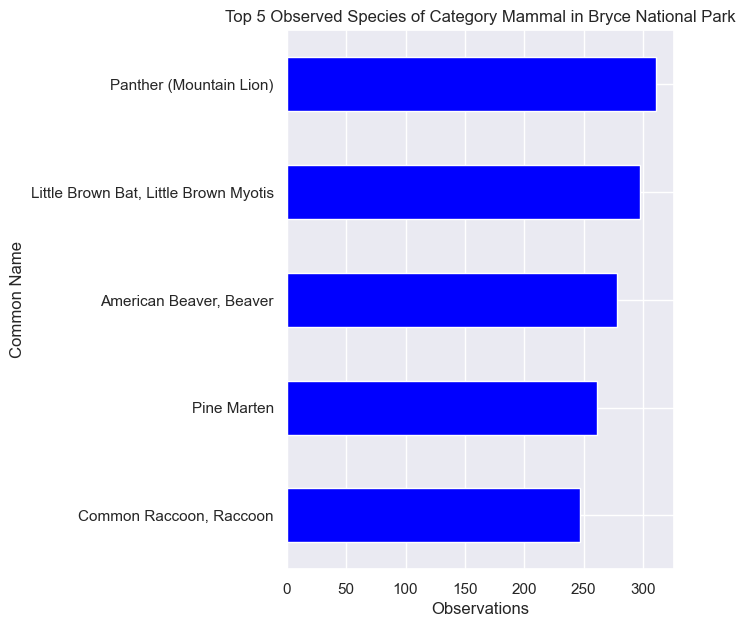

<Figure size 500x700 with 0 Axes>

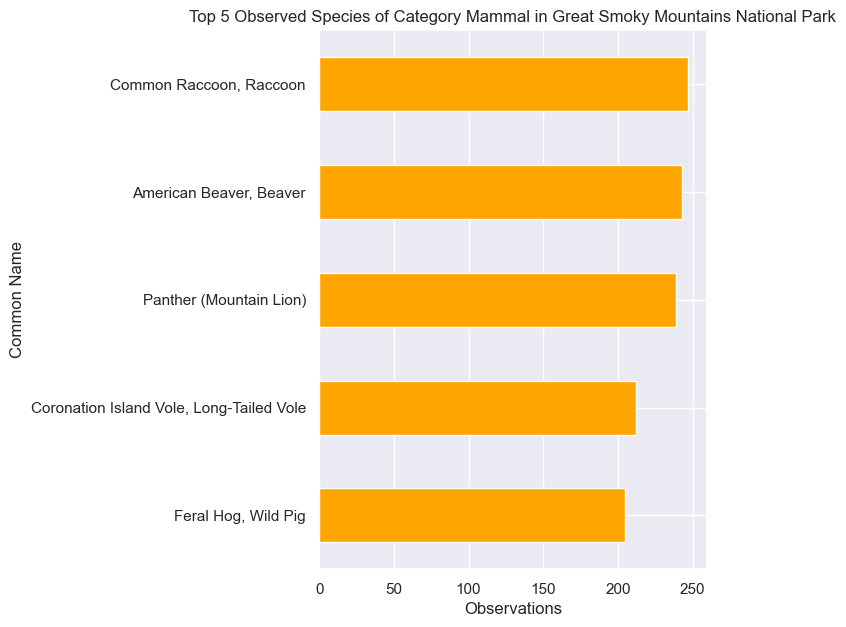

<Figure size 500x700 with 0 Axes>

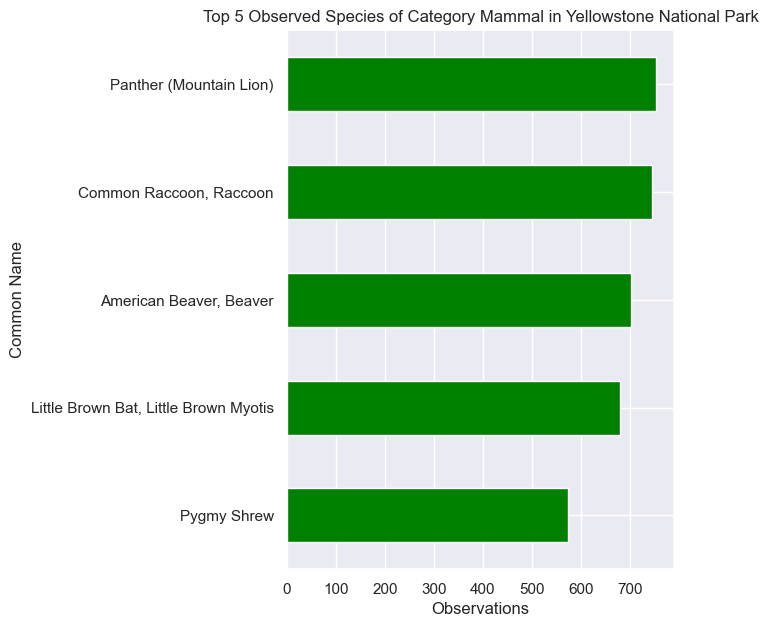

<Figure size 500x700 with 0 Axes>

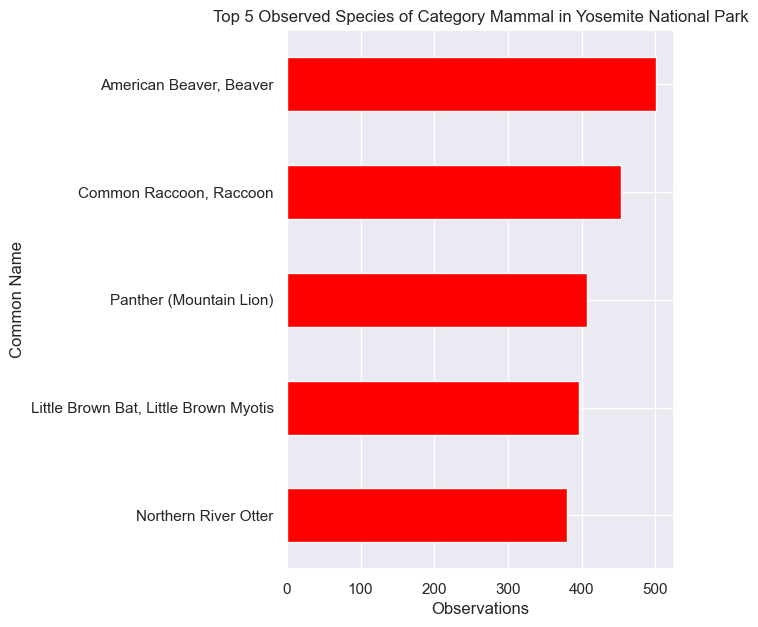

<Figure size 500x700 with 0 Axes>

In [15]:
top5_of_cat(observations_species_info_df, 'Bryce National Park', 'Mammal', bar_color='blue')
top5_of_cat(observations_species_info_df, 'Great Smoky Mountains National Park', 'Mammal', bar_color='orange')
top5_of_cat(observations_species_info_df, 'Yellowstone National Park', 'Mammal', bar_color='green')
top5_of_cat(observations_species_info_df, 'Yosemite National Park', 'Mammal', bar_color='red')

The parks feature a lot of commonalities in their top five mammal species according to this dataset. Each park has the Mountain Lion, American Beaver, and Raccoon in their top 5. The Little Brown Bat made it to the list in every park except the Great Smoky Mountains. Other top five observed species include Pine Marten, Long-Tailed Vole, Wild Pig, Pygmy Shrew, and Northern River Otter.

### Discussion and Limitations

The four national parks in this dataset have a lot in common. All 5541 species have been observed in each park. As a result, each park plays a role in the conservation efforts of threatened and endangered species. The similarities even span proportional numbers of observations; several parks had identical least and most sighted species, which appear to be signs of parallels in flora and fauna between the parks. With caution, findings about the ecological system in one park could potentially inform conservation efforts in another.

There are several points of caution that should be noted about this analysis. 
1. The numbers in this dataset are only observations, not meticulously tracked population counts. The dataset gave no information about park staffing for wildlife observations or the process about making and recording observations. It is possible that differences across observation methods and people available to contribute to this data made it less comparable across parks as we may assume.
2. There could be many more species than entered in this dataset, especially animals and plants that only live in one particular park.
3. The dataset did not come with a date. There may be updates about observation sizes or conservation status that this analysis did not take into account.
4. It surprised me that each species was found in each park. Such different areas of the US. E.g. Californian Red-legged Frog, the common name could be misleading, but from an initial internet search I could not find any record of this frog existing on the east coast. Thus, more research on the validity of this data may be necessary to draw meaningful conclusions.
5. I interpreted multiple entries of the same species in the same park as separate observations, grouping by species in that park, thus adding them up. There was no way to know whether these entries were species-park duplicates with different numbers or their own entries. As a result, it is possible that I erroneously inflated sightings of some species such as the Panther (Mountain Lion).